# 1) Importing the Dataset

In [2]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from wordcloud import WordCloud
from collections import Counter

In [3]:
# import the dataset

df=pd.read_csv("dataset_for_spam_classifier.csv")

# 2) Data Cleaning 

In [4]:
# Get the information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop the unnecessary columns in the dataset

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Rename the columns

df.rename(columns={'v1':'Type','v2':'Message'},inplace=True)

In [8]:
df

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Encode the 'Type' column

df['Type']=encoder.fit_transform(df['Type'])

In [10]:
df

,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
# check for missing values

df.isnull().sum()

Type       0
Message    0
dtype: int64

In [12]:
# Check for duplicate values

df.duplicated().sum()

403

In [13]:
# Remove duplicate values

df=df.drop_duplicates(keep='first')

In [14]:
# Recheck for duplicates

df.duplicated().sum()

0

In [15]:
# Check the dimensions of the dataframe

df.shape

(5169, 2)

# 3) Data Analysis

In [16]:
# Count the values of 'Type' column
df['Type'].value_counts()

0    4516
1     653
Name: Type, dtype: int64

([<matplotlib.patches.Wedge at 0x1e6192c0850>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

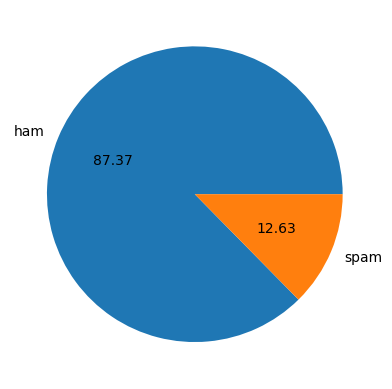

In [17]:
# Plot a pie chart for 'Type' column

plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [18]:
# Count the number of characters in a message

df['num_of_characters']=df['Message'].apply(len)

C:\Users\vinot\AppData\Local\Temp\ipykernel_18528\4203640258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_characters']=df['Message'].apply(len)


In [19]:
df

,Type,Message,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
# Count the number of words in a message

df['num_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\vinot\AppData\Local\Temp\ipykernel_18528\3440872596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [21]:
df

,Type,Message,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
# Count the number of sentences in a message

df['num_of_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\vinot\AppData\Local\Temp\ipykernel_18528\1593694760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [23]:
df

,Type,Message,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
# Get the descriptive statistics for the entire dataframe

df[['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# Get the descriptive statistics for the ham messages

df[df['Type']==0][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Get the descriptive statistics for the spam messages

df[df['Type']==1][['num_of_characters','num_of_words','num_of_sentences']].describe()

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_characters', ylabel='Count'>

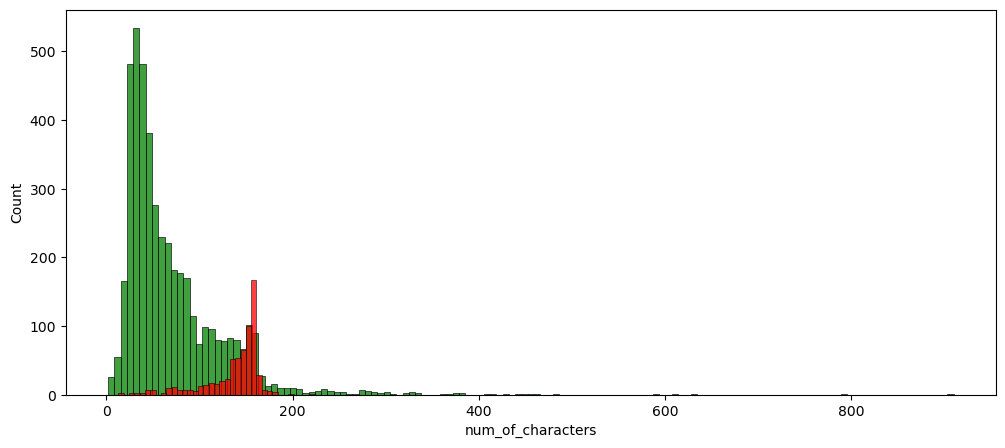

In [27]:
# Plot a histogram for 'num_of_characters' column

plt.figure(figsize=(12,5))
sns.histplot(df[df['Type']==0]['num_of_characters'],color='green')
sns.histplot(df[df['Type']==1]['num_of_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

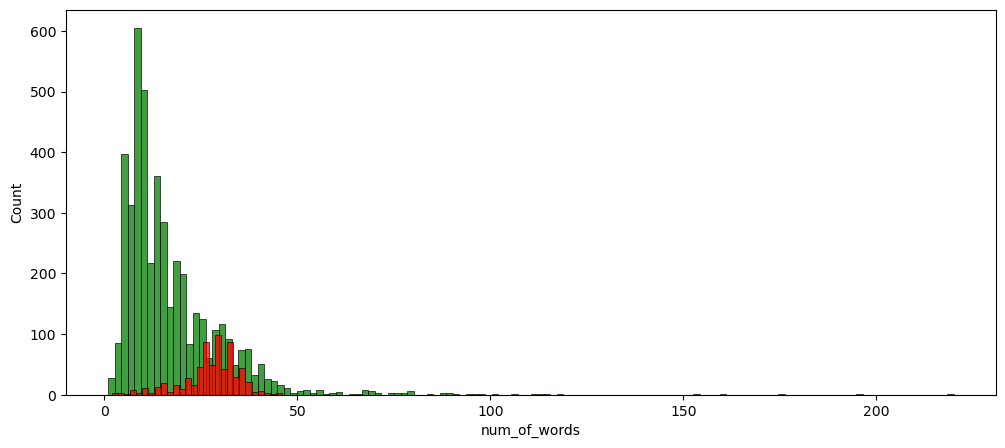

In [28]:
# Plot a histogram for 'num_of_words' column

plt.figure(figsize=(12,5))
sns.histplot(df[df['Type']==0]['num_of_words'],color='green')
sns.histplot(df[df['Type']==1]['num_of_words'],color='red')

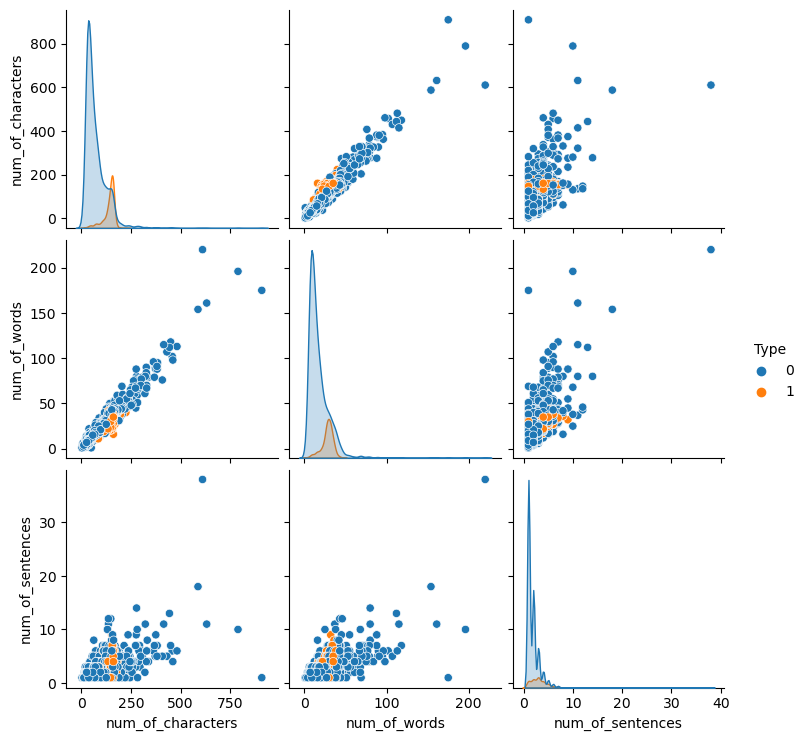

In [29]:
# Plot a pair plot to visualize the relationships between the variables in the dataset by pairing them in a grid

sns.pairplot(df,hue='Type')

C:\Users\vinot\AppData\Local\Temp\ipykernel_18528\83354715.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

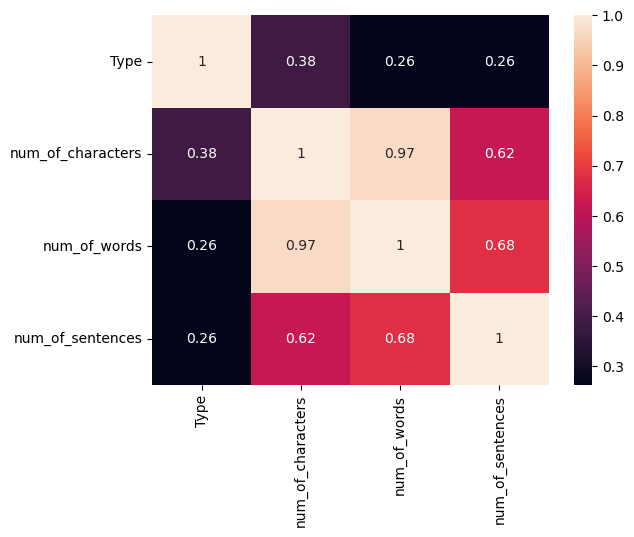

In [30]:
# Plot a heat map to visualize the correlation matrix of values

sns.heatmap(df.corr(),annot=True)


# 4) Data Preprocessing

In [31]:
# Function for preprocess the dataset

def transform_text(text):
    # Convert the message to lower case
    text=text.lower()
    
    # Tokenize the message
    text=nltk.word_tokenize(text)
    
    # Remove the special characters in the message
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    # Remove the stop words and punctuations in the message
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    # Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

df['transformed_text']=df['Message'].apply(transform_text)

C:\Users\vinot\AppData\Local\Temp\ipykernel_18528\285399697.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['Message'].apply(transform_text)


In [32]:
df

,Type,Message,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [33]:
# Writing to a csv file

df.to_csv("processed_dataset.csv")


# 5) Data Visualization

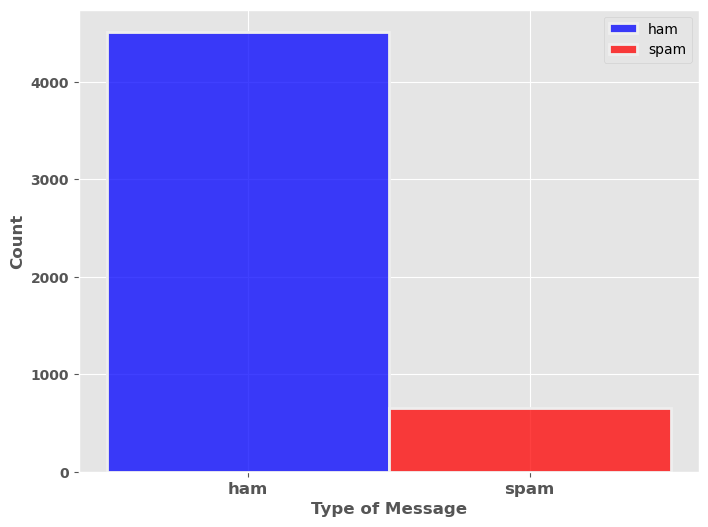

In [34]:
# Plot a histogram for ham and spam messages

from matplotlib import style
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.histplot(df[df['Type']==0]['Type'],color='blue', label='ham', linewidth=2)
sns.histplot(df[df['Type']==1]['Type'],color='red', label='spam', linewidth=2)
plt.xticks([0, 1], ['ham', 'spam'],fontsize=12,fontweight='bold')  
plt.yticks(fontweight='bold')
plt.xlabel('Type of Message',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.legend()
plt.show()

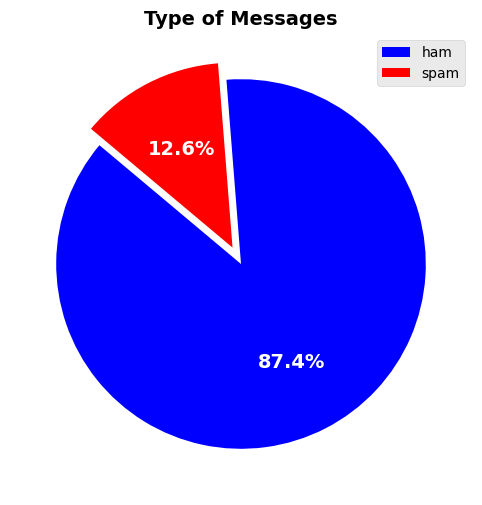

In [35]:
# Plot a pie chart for ham and spam messages

ham_count = len(df[df['Type'] == 0])
spam_count = len(df[df['Type'] == 1])
labels = ['ham', 'spam']
sizes = [ham_count, spam_count]
colors = ['blue', 'red']
explode = (0, 0.1) 
plt.figure(figsize=(8, 6))
plt.pie(sizes,
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%',
        textprops={'color': 'white', 'size':'14','weight': 'bold'} ,
        startangle=140)
plt.title('Type of Messages', fontsize=14, fontweight='bold')
plt.legend()
plt.show()


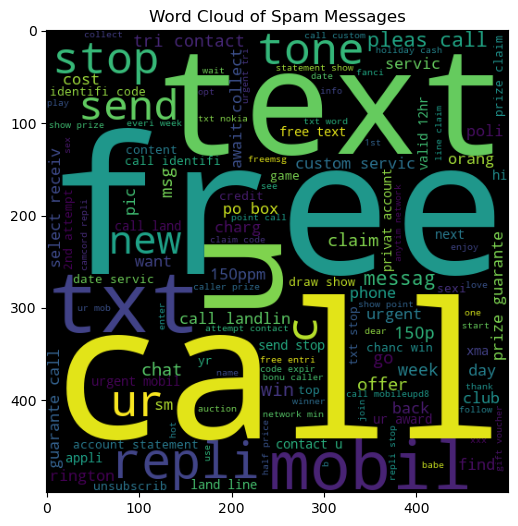

In [36]:
# Word cloud of spam messages

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_wc=wc.generate(df[df['Type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.rcdefaults() 
plt.figure(figsize=(15,6))
plt.title("Word Cloud of Spam Messages")
plt.imshow(spam_wc)

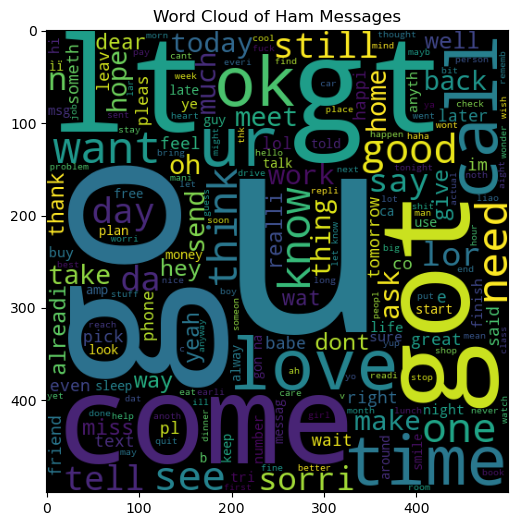

In [37]:
# Word cloud of ham messages

ham_wc=wc.generate(df[df['Type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.rcdefaults() 
plt.figure(figsize=(15,6))
plt.title("Word Cloud of Ham Messages")
plt.imshow(spam_wc)

In [38]:
# All words in spam messages

spam_corpus = []
for msg in df[df['Type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
# number of  words in spam messages

len(spam_corpus)

9939

In [40]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

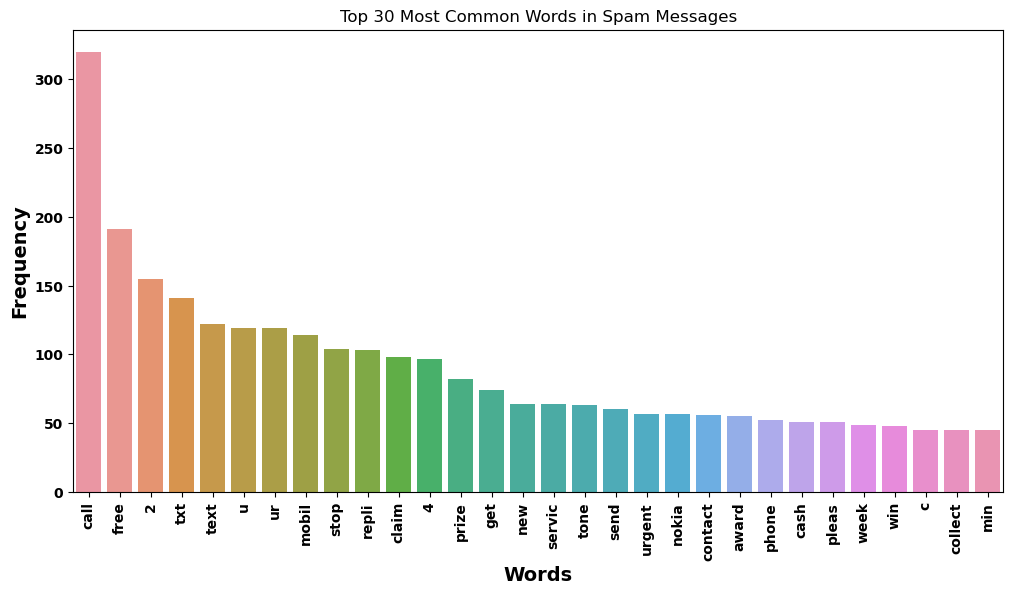

In [41]:
 # Plot a bar chart for top 30 most common words in spam messages
    
word_counts = Counter(spam_corpus)
common_words= dict(word_counts.most_common(30))
spam_words = list(common_words.keys())
counts = list(common_words.values())

plt.figure(figsize=(12, 6))
sns.barplot(x=spam_words, y=counts)
plt.xticks(rotation='vertical',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Words',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',fontweight='bold',fontsize=14)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [42]:
# All words in ham messages

ham_corpus = []
for msg in df[df['Type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
# number of  words in ham messages

len(ham_corpus)

35404

In [44]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

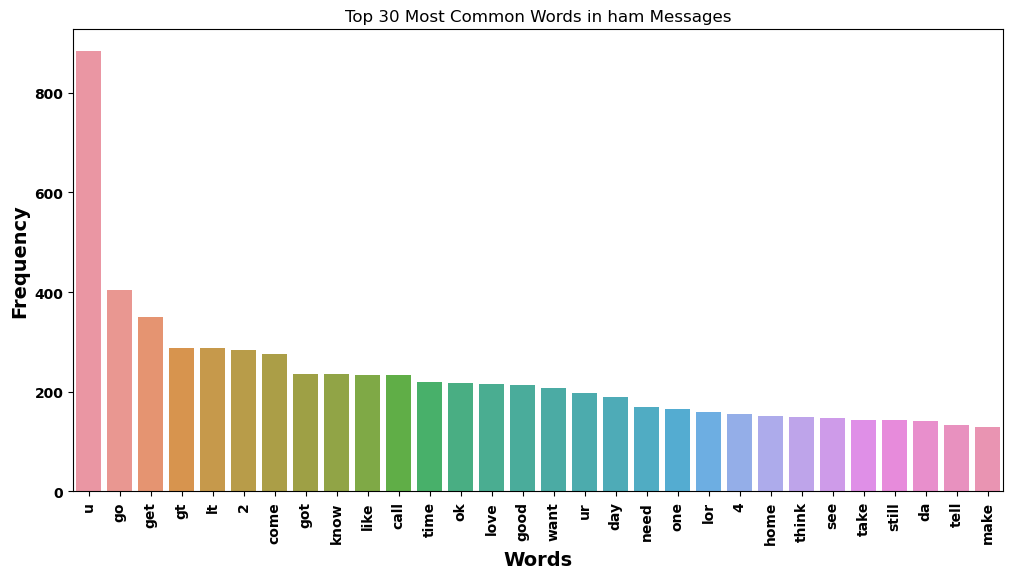

In [45]:
 # Plot a bar chart for top 30 most common words in spam messages

word_counts = Counter(ham_corpus)
common_words = dict(word_counts.most_common(30))
ham_words = list(common_words.keys())
counts = list(common_words.values())

plt.figure(figsize=(12, 6))
sns.barplot(x=ham_words, y=counts)
plt.xticks(rotation='vertical',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Words',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',fontweight='bold',fontsize=14)
plt.title('Top 30 Most Common Words in ham Messages')
plt.show()



In [46]:
# All the common words in ham and spam messages

intersect_words = [word for word in ham_corpus if word in spam_corpus]

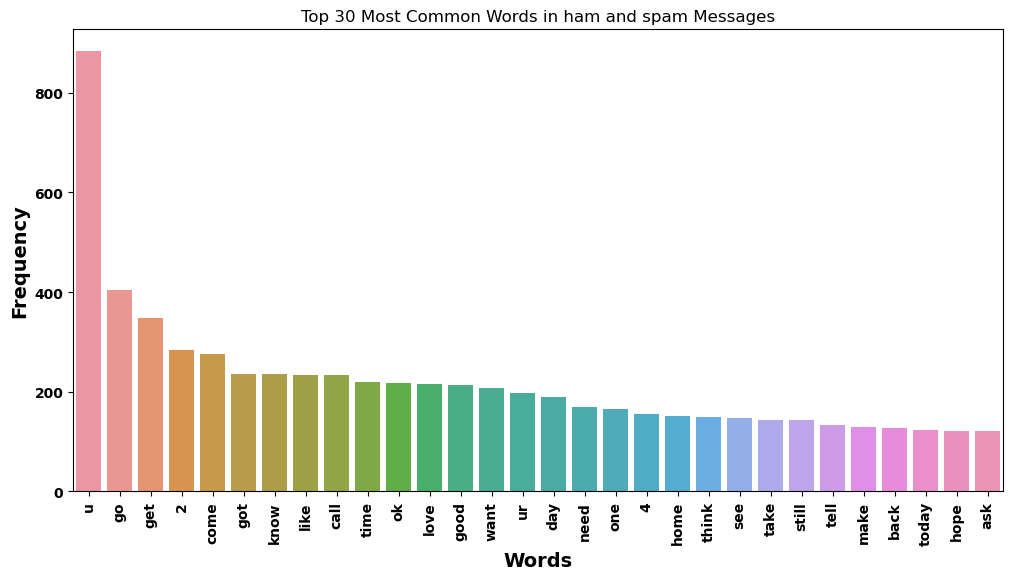

In [47]:
# Plot a bar chart for top 30 most common words in ham and spam messages

word_counts = Counter(intersect_words)
common_words = dict(word_counts.most_common(30))
words = list(common_words.keys())
counts = list(common_words.values())

plt.figure(figsize=(12, 6))
sns.barplot(x=words, y=counts)
plt.xticks(rotation='vertical',fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Words',fontsize=14,fontweight='bold')
plt.ylabel('Frequency',fontsize=14,fontweight='bold')
plt.title('Top 30 Most Common Words in ham and spam Messages')
plt.show()

In [48]:
# Unique words in spam messages

spam_corpus_unique=set(spam_corpus)

In [49]:
# Number of unique words in spam messages

len(spam_corpus_unique)

2222

In [50]:
# Unique words in ham messages

ham_corpus_unique=set(ham_corpus)

In [51]:
# Number of unique words in ham messages

len(ham_corpus_unique)

5390

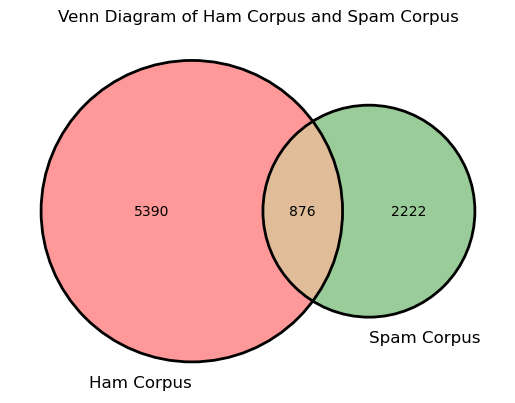

In [52]:
from matplotlib_venn import venn2, venn2_circles

# Calculate the number of unique words in ham_corpus, spam_corpus, and their intersection
num_ham_words = len(ham_corpus_unique)
num_spam_words = len(spam_corpus_unique)
num_common_words = len(ham_corpus_unique.intersection(spam_corpus_unique))

# Create a Venn diagram with labels
venn = venn2(subsets=(num_ham_words, num_spam_words, num_common_words),
             set_labels=('Ham Corpus', 'Spam Corpus'))

# Display the number of words in each set
venn.get_label_by_id('10').set_text(str(num_ham_words))
venn.get_label_by_id('01').set_text(str(num_spam_words))
venn.get_label_by_id('11').set_text(str(num_common_words))

# Add circle outlines
venn_circles = venn2_circles(subsets=(num_ham_words, num_spam_words, num_common_words))

# Set plot title
plt.title("Venn Diagram of Ham Corpus and Spam Corpus")
plt.show()



# 6) Feature Extraction


In [53]:
# Import necessary dependencies for feature extraction

from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Perform feature extraction 

tfidf=TfidfVectorizer()

# x is the input feature
x=tfidf.fit_transform(df['transformed_text']).toarray()

# y is the ouput feature
y=df['Type'].values

In [55]:
# Input feature

x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
x.shape

(5169, 6708)

In [57]:
# Output feature

y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
y.shape

(5169,)

# 7) Modelling

In [59]:
# import the dependency for spliting train and test sets

from sklearn.model_selection import train_test_split

In [60]:
# Split the input and output features into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
# Import the necessary dependencies for creating a neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [62]:
# Create a neural network with a input layer, three hidden layers and a output layer
# No.of neurons in input layer is determined by input shape and input layer uses 'relu' activation function
# 500 neurons in 1st hidden layer and it uses 'relu' activation function
# 500 neurons in 2nd hidden layer and it uses 'relu' activation function
# 100 neurons in 3rd hidden layer and it uses 'relu' activation function
# 100 neurons in 4th hidden layer and it uses 'relu' activation function
# 1 neuron in output  layer and it uses 'sigmoid' activation function

model=Sequential()
model.add(Dense(units=500,input_shape=(6708,),activation='relu'))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [63]:
# Compile the model
# Use binary_crossentropy loss function
# Use adam optimizer
# Use accuracy metrics for monitoring

model.compile(loss='binary_crossentropy' ,optimizer='adam',metrics='accuracy')

In [64]:
# Train the model on the  dataset

model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
65/65 [==============================] - 5s 42ms/step - loss: 0.2656 - accuracy: 0.8716
Epoch 2/10
65/65 [==============================] - 3s 42ms/step - loss: 0.1033 - accuracy: 0.9778
Epoch 3/10
65/65 [==============================] - 3s 42ms/step - loss: 0.0573 - accuracy: 0.9981
Epoch 4/10
65/65 [==============================] - 3s 42ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 5/10
65/65 [==============================] - 3s 42ms/step - loss: 1.4590e-04 - accuracy: 1.0000
Epoch 6/10
65/65 [==============================] - 3s 42ms/step - loss: 5.7042e-05 - accuracy: 1.0000
Epoch 7/10
65/65 [==============================] - 3s 42ms/step - loss: 3.2837e-05 - accuracy: 1.0000
Epoch 8/10
65/65 [==============================] - 3s 42ms/step - loss: 2.1247e-05 - accuracy: 1.0000
Epoch 9/10
65/65 [==============================] - 3s 42ms/step - loss: 1.4813e-05 - accuracy: 1.0000
Epoch 10/10
65/65 [==============================] - 3s 43ms/step - loss: 1.1001e-05 - ac

In [65]:
# Model evaluation

results = model.evaluate(x_test, y_test)
print('Accuracy: {:.2%}'.format(results[1]))


33/33 [==============================] - 1s 10ms/step - loss: 0.2281 - accuracy: 0.9739
Accuracy: 97.39%


In [67]:
# Use the model on user input

def transform_text(text):
    # Convert the message to lower case
    text=text.lower()
    
    # Tokenize the message
    text=nltk.word_tokenize(text)
    
    # Remove the special characters in the message
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    # Remove the stop words and punctuations in the message
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    # Stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

user_text = input('Input the text: ')
preprocessed_text=transform_text(user_text)
vectorized_text=tfidf.transform([preprocessed_text]).toarray()

prediction = model.predict(vectorized_text)

print('Spam level: {:.2%}'.format(prediction[0][0]))

if prediction > 0.8:
    print('Spam!')
else:
    print('Not spam!')


Input the text: Hey, how are you, can you send me the notes for the yesterday's class?
1/1 [==============================] - 0s 47ms/step
Spam level: 0.00%
Not spam!
